Udacity Machine Learning 
======

In this notebook, I introduce the project and dataset. 

## Overview

This project is based on the paper **How Do Humans Sketch Objects?** published in journal *ACM Transactions on Graphics (Proc. SIGGRAPH 2012)* by **Mathias Eitz, James Hays and Marc Alexa**. Research available: http://cybertron.cg.tu-berlin.de/eitz/projects/classifysketch/ 

The paper was comparing sketch recognition performance of people and their recognition system, citing people accurately identified 73% of the object category from sketches while in comparison, their system achieved 56% accuracy. The complete crowd-sourced dataset of sketches to the community was released under Creative Commons. 

This project follows their agenda (and general approach) of trying to accurately classify a users sketch to a trained category using a subset of their data. The motivation for choosing this was due to is close relationship to my work (Design and Machine Learning/Intelligent Interfaces).*

## Dataset

The dataset is available http://cybertron.cg.tu-berlin.de/eitz/projects/classifysketch/ and released publicly under the Creative Commons license.  

The **full** dataset consist of 250 categories each containing 80 samples (20000). SVG and PNG versions are made available, where each sample (PNG) consists of a 1111x1111 sketch of the relevant category object, files organised into their categories within sub-directories.  

Because of computing demands a subset of 113 categories were selected, this list can be found in the accompanying subset_labels.csv file. For illustrative purposes, below shows 2 images from categories. 

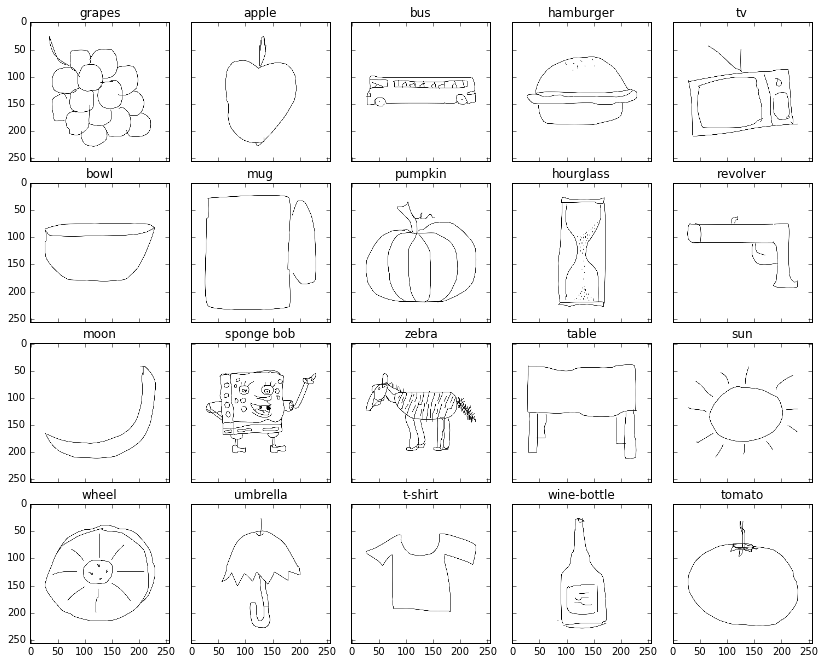

In [103]:
categories = get_category_subset_list()[:20]
image_categories, images = load_images(categories=categories)
show_images(images=images, image_categories=image_categories)

## Test Set

A randomly generated test set was created to be used for evaluation through-out the process. This test set is defined in the accompanied file *test_set.json*, containing a dictionary structure for each category and corresponding file names. 8 (10%) of the images were selected from each category to form this test set.

## Evaluation

Performance of the *features* and *model* are based on:  

**Log Loss (Logarithmic Loss):**  
Log Loss quantifies the accuracy of a classifier by penalising false classifications i.e. minimising the Log Loss is basically equivalent to maximising the accuracy.  
Log Loss heavily penalises classifiers that are confident about an incorrect classification e.g. if for a particular observation, the classifier assigns a very small probability to the correct class then the corresponding contribution to the Log Loss will be very large. 

More details can be found: https://www.kaggle.com/wiki/LogarithmicLoss  

**Accuracy score:**  
The fraction of correct predictions.  

**Accuracy of the top 10:** For each k, how accurate is the model i.e. when k is set to 2, then consider a correct prediction if the predicted probability includes the correct prediction within the top 2 predictions.   

--- 

## Appendix

In [20]:
from IPython.core.display import HTML
import pandas as pd 
import numpy as np
import time 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import ImageGrid
import json
import csv

import cv2
import scipy

%matplotlib inline
plt.style.use('seaborn-pastel')

In [7]:
def get_category_subset_list(filename="../sketchrecognition/subset_labels.csv"):
    categories = []
    with open(filename, 'rb') as csvfile:
        csv_reader = csv.reader(csvfile)
        for row in csv_reader:
            categories.extend(row)
            
    return categories

In [101]:
def load_images(root_folder="../png/", categories=[], category_count=1, target_size=256):
    import os 
    
    images=[]
    image_categories = []
    
    for category in categories:
        files = os.listdir("{}{}".format(root_folder, category))
        for i in range(category_count):
            image_categories.append(category)
            
            f = files[i]
            img = cv2.imread("{}{}/{}".format(root_folder, category, f), cv2.IMREAD_GRAYSCALE)
            resize_ratio = float(target_size)/float(max(img.shape[0], img.shape[1]))
            images.append(
                cv2.resize(
                    img,(int(resize_ratio * img.shape[0]), int(resize_ratio * img.shape[1])), interpolation = cv2.INTER_CUBIC
                )
            )            
            
    return image_categories, images

In [18]:
def show_image(img):
    plt.imshow(image, cmap=plt.cm.Greys_r)

In [100]:
def show_images(images, image_categories, cols=5):
    rows = int(float(len(images))/float(cols))
    
    fig = plt.figure(1, (14, 14))
    
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(rows, cols),  # creates 2x2 grid of axes
                     axes_pad=0.3  # pad between axes in inch.
                    )

    for i in range(len(images)):
        grid[i].set_title(image_categories[i])
        grid[i].imshow(images[i], cmap=plt.cm.Greys_r)  # The AxesGrid object work as a list of axes.

    plt.show()